# 합성곱 신경망

## CNN

In [27]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

(train_X, train_y), (test_X,test_y) = mnist.load_data()

train_X = train_X.reshape(train_X.shape[0], 28, 28, 1)
test_X = test_X.reshape(test_X.shape[0],28, 28, 1)

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X /= 255
test_X /= 255
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_y = tf.keras.utils.to_categorical(train_y, 10)
test_y = tf.keras.utils.to_categorical(test_y, 10)

train_X shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [28]:
import keras
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
             optimizer='Adam', metrics=['accuracy'])
hist = model.fit(train_X, train_y, validation_data=(test_X, test_y),
                batch_size=128, epochs=10, verbose=1)

score = model.evaluate(test_X, test_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
469/469 [==============================] - 32s 65ms/step - loss: 0.3297 - accuracy: 0.8979 - val_loss: 0.0667 - val_accuracy: 0.9793
Epoch 2/10
469/469 [==============================] - 29s 62ms/step - loss: 0.1082 - accuracy: 0.9679 - val_loss: 0.0411 - val_accuracy: 0.9873
Epoch 3/10
469/469 [==============================] - 28s 61ms/step - loss: 0.0799 - accuracy: 0.9769 - val_loss: 0.0380 - val_accuracy: 0.9880
Epoch 4/10
469/469 [==============================] - 28s 59ms/step - loss: 0.0680 - accuracy: 0.9797 - val_loss: 0.0311 - val_accuracy: 0.9900
Epoch 5/10
469/469 [==============================] - 28s 60ms/step - loss: 0.0578 - accuracy: 0.9826 - val_loss: 0.0297 - val_accuracy: 0.9899
Epoch 6/10
469/469 [==============================] - 28s 61ms/step - loss: 0.0527 - accuracy: 0.9844 - val_loss: 0.0287 - val_accuracy: 0.9908
Epoch 7/10
469/469 [==============================] - 28s 60ms/step - loss: 0.0461 - accuracy: 0.9856 - val_loss: 0.0227 - val_accuracy:

In [29]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_13 (Dropout)        (None, 5, 5, 64)         

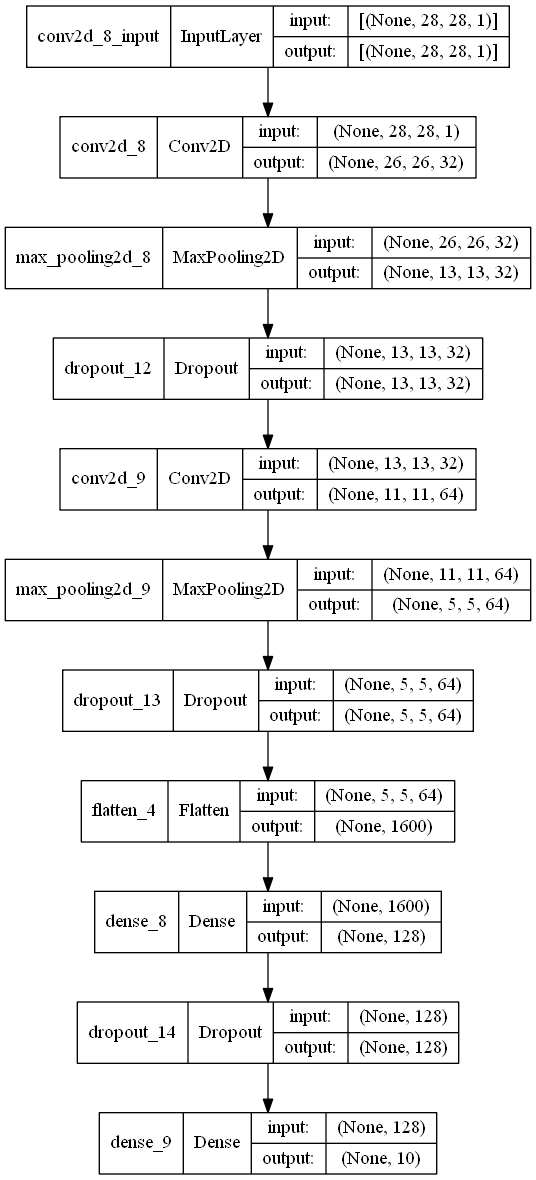

In [33]:
tf.keras.utils.plot_model(model, show_shapes=True)

No handles with labels found to put in legend.


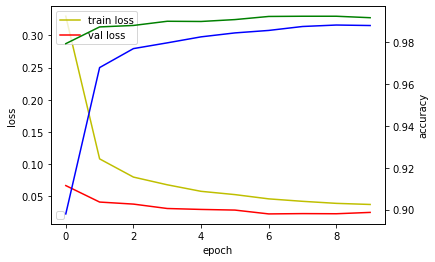

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, loss_ax = plt.subplots()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'],'b')
acc_ax.plot(hist.history['val_accuracy'], 'g')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')
plt.show()

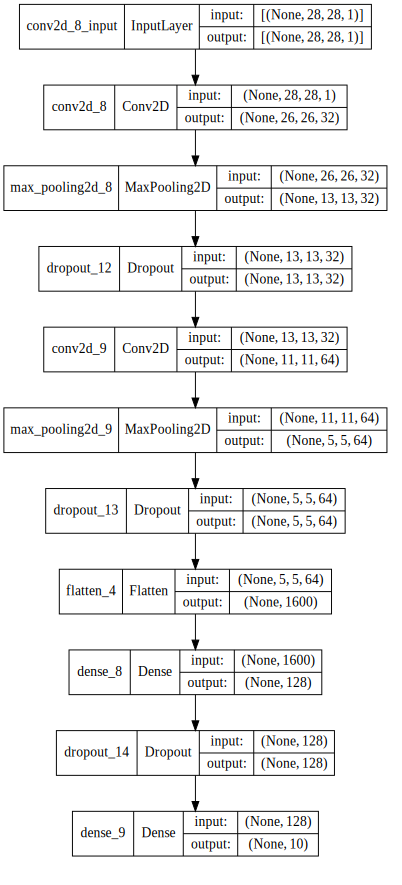

In [34]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline

SVG(model_to_dot(model,show_shapes=True, dpi=70).create(prog='dot',format='svg'))

## CNN 알고리즘

### LeNet

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import backend as K

class LeNet:
    @staticmethod
    def build(numChannels, imgRows, imgCols, numClasses,
             activation='relu'):
        
        model=Sequential()
        inputShape = (imgRows, imgCols, numChannels)
        # 'channels first이면 shape를 변경'
        if K.image_data_format() == 'channels_first':
            inputShpae=(numChannels, imgRows, imgCols)
        # 첫 번째 CONV => ACTIVATION => POOL 계층
        model.add(Conv2D(6, 5, padding='same',
                        input_shape=inputShape))
        model.add(Activation(activation))
        model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
        # 두 번째 CONV => ACTIVATION => POOL 계층
        model.add(Conv2D(16,5,padding='same'))
        model.add(Activation(activation))
        model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
        # 첫 번째 FC 계층
        model.add(Flatten())
        model.add(Dense(120))
        model.add(Activation(activation))
        # 두 번째 FC 계층
        model.add(Dense(84))
        model.add(Activation(activation))
        # 출력층 soft-max 활성화 함수 사용
        model.add(Dense(numClasses))
        model.add(Activation('softmax'))
        
        return model

### VGG19

In [56]:
from tensorflow.keras.initializers import RandomNormal
class VGG19:
    @staticmethod
    def build(input_shape=(224,224,3), activation='relu'):
        model = Sequential()
        model.add(Conv2D(64, (3,3), input_shape=input_shape,
                         padding='same', activation=activation,
                        kernel_initializer=RandomNormal(stddev=0.01)))
        model.add(Conv2D(64, (3,3), input_shape=input_shape,
                         padding='same', activation=activation,
                        kernel_initializer=RandomNormal(stddev=0.01)))
        model.add(MaxPooling2D(pool_size=(2,2)))

        model.add(Conv2D(128, (3,3), input_shape=input_shape,
                         padding='same', activation=activation,
                        kernel_initializer=RandomNormal(stddev=0.01)))
        model.add(Conv2D(128, (3,3), input_shape=input_shape,
                         padding='same', activation=activation,
                        kernel_initializer=RandomNormal(stddev=0.01)))
        model.add(MaxPooling2D(pool_size=(2,2)))
        
        model.add(Conv2D(256, (3,3), input_shape=input_shape,
                         padding='same', activation=activation,
                        kernel_initializer=RandomNormal(stddev=0.01)))
        model.add(Conv2D(256, (3,3), input_shape=input_shape,
                         padding='same', activation=activation,
                        kernel_initializer=RandomNormal(stddev=0.01)))
        model.add(Conv2D(256, (3,3), input_shape=input_shape,
                         padding='same', activation=activation,
                        kernel_initializer=RandomNormal(stddev=0.01)))
        model.add(Conv2D(256, (3,3), input_shape=input_shape,
                         padding='same', activation=activation,
                        kernel_initializer=RandomNormal(stddev=0.01)))
        model.add(MaxPooling2D(pool_size=(2,2)))
        
        model.add(Conv2D(512, (3,3), input_shape=input_shape,
                         padding='same', activation=activation,
                        kernel_initializer=RandomNormal(stddev=0.01)))
        model.add(Conv2D(512, (3,3), input_shape=input_shape,
                         padding='same', activation=activation,
                        kernel_initializer=RandomNormal(stddev=0.01)))
        model.add(Conv2D(512, (3,3), input_shape=input_shape,
                         padding='same', activation=activation,
                        kernel_initializer=RandomNormal(stddev=0.01)))
        model.add(Conv2D(512, (3,3), input_shape=input_shape,
                         padding='same', activation=activation,
                        kernel_initializer=RandomNormal(stddev=0.01)))
        model.add(MaxPooling2D(pool_size=(2,2)))
        
        model.add(Conv2D(512, (3,3), input_shape=input_shape,
                         padding='same', activation=activation,
                        kernel_initializer=RandomNormal(stddev=0.01)))
        model.add(Conv2D(512, (3,3), input_shape=input_shape,
                         padding='same', activation=activation,
                        kernel_initializer=RandomNormal(stddev=0.01)))
        model.add(Conv2D(512, (3,3), input_shape=input_shape,
                         padding='same', activation=activation,
                        kernel_initializer=RandomNormal(stddev=0.01)))
        model.add(Conv2D(512, (3,3), input_shape=input_shape,
                         padding='same', activation=activation,
                        kernel_initializer=RandomNormal(stddev=0.01)))
        model.add(MaxPooling2D(pool_size=(2,2)))
        
        model.add(Flatten())
        model.add(Dense(4096, activation=activation))
        model.add(Dense(4096, activation=activation))
        model.add(Dense(1000, activation='softmax'))

        model.compile(loss=tf.keras.losses.categorical_crossentropy,
                     optimizer='Adam', metrics=['accuracy'])
        return model

In [57]:
model=VGG19.build()

In [58]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_43 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_45 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                 

In [59]:
# 기존에 있는 모델의 weight만 가져와서 생성한 모델에 넣어보기
from tensorflow.keras.applications.vgg19 import VGG19
vgg = VGG19()

In [60]:
weights = vgg.get_weights()
model.set_weights(weights)

In [65]:
# 사진불러와서 예측해보기
from tensorflow.keras.preprocessing import image
img = image.load_img('2020062615503065168.jpg',target_size=(224,224))
img_data = image.img_to_array(img)

In [66]:
print('before reshape:', img_data.shape)
import numpy as np
img_data = img_data[np.newaxis,...]
print('after reshape:', img_data.shape)

before reshape: (224, 224, 3)
after reshape: (1, 224, 224, 3)


In [67]:
pred = model.predict(img_data)
from tensorflow.keras.applications.vgg19 import decode_predictions
print(decode_predictions(pred, top=3))

[[('n02100735', 'English_setter', 0.50871134), ('n02101556', 'clumber', 0.44462764), ('n02091635', 'otterhound', 0.008016382)]]
